In [20]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal
import math

In [21]:
# create state
class EquationState(TypedDict):
    a: int
    b: int
    c: int
    discriminant: float
    equation: str
    result: str

In [22]:
# create nodes
def createEquation(state: EquationState):
    equation = f"{state['a']}x2{state['b']}x{state['c']}"

    return {"equation": equation}

def findDiscriminant(state: EquationState):
    d = (state['b']**2)-(4*state['a']*state['c'])
    return {"discriminant": d}

def realRoots(state: EquationState):
    root1 = (-state['b'] + math.sqrt(state['discriminant']))/(2*state['a'])
    root2 = (-state['b'] - math.sqrt(state['discriminant']))/(2*state['a'])

    return {"result": f"There are 2 real roots: {root1}, {root2}"}

def repeatedRoots(state: EquationState):
    root = (-state['b'])/(2*state['a'])

    return {"result": f"There is 1 repeated root: {root}"}

def noRealRoots(state: EquationState):

    return {"result": "There is no real roots"}

def checkCondition(state: EquationState) -> Literal["realRoots", "repeatedRoots", "noRealRoots"]:

    if state["discriminant"] > 0:
        return "realRoots"
    elif state["discriminant"] == 0:
        return "repeatedRoots"
    else:
        return "noRealRoots"


In [23]:
# define graph
graph = StateGraph(EquationState)

In [24]:
# define nodes
graph.add_node("createEquation", createEquation)
graph.add_node("findDiscriminant", findDiscriminant)
graph.add_node("realRoots", realRoots)
graph.add_node("noRealRoots", noRealRoots)
graph.add_node("repeatedRoots", repeatedRoots)

In [25]:
# define edges
graph.add_edge(START, "createEquation")
graph.add_edge("createEquation", "findDiscriminant")

graph.add_conditional_edges("findDiscriminant", checkCondition)

graph.add_edge("realRoots", END)
graph.add_edge("repeatedRoots", END)
graph.add_edge("noRealRoots", END)

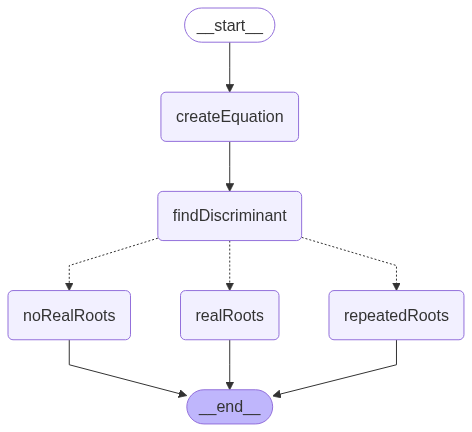

In [26]:
# compile graph
workflow = graph.compile()
workflow

In [ ]:
# execute
initial_state = {
    'a': 2, 
    'b': -4,
    'c': -2
}

workflow.invoke(initial_state)

{'a': 2,
 'b': -4,
 'c': -2,
 'discriminant': 32,
 'equation': '2x2-4x-2',
 'result': 'There are 2 real roots: 2.414213562373095, -0.41421356237309515'}